## Otimizador de carga de caminhão usando algoritmo genético

✅ Qual é o problema real?

Trabalhamos numa transportadora e precisamos definir:

Quais cargas colocar em um caminhão para aproveitar ao máximo sua capacidade, sem ultrapassar o peso e, se for o caso, o volume.

Mas tem um detalhe:
Nem sempre queremos encher o caminhão de qualquer coisa. Às vezes, queremos maximizar o valor transportado. Por exemplo:

Levar 10 caixas baratas pode usar todo o espaço e peso.

Levar 3 caixas caras pode dar mais lucro e usar menos espaço.

Então:

⚠️ Temos um problema de otimização com restrições.

🎯 O que queremos otimizar nesse problema?

Maximizar:
O valor total das cargas.

Respeitar as restrições:
Peso total <= capacidade do caminhão.

## Implementação

In [355]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [356]:
cargas = [
    {"nome": "Cimento", "peso": 200, "volume": 1.5, "valor": 500},
    {"nome": "Madeira", "peso": 300, "volume": 4.0, "valor": 700},
    {"nome": "Aço", "peso": 500, "volume": 3.0, "valor": 1500},
    {"nome": "Ferramentas", "peso": 150, "volume": 0.5, "valor": 400},
    {"nome": "Produtos de Limpeza", "peso": 100, "volume": 1.0, "valor": 200},
    {"nome": "Móveis", "peso": 350, "volume": 5.0, "valor": 900},
    {"nome": "Eletrônicos", "peso": 250, "volume": 1.2, "valor": 1100},
    {"nome": "Alimentos", "peso": 180, "volume": 2.5, "valor": 300},
    {"nome": "Ferragens", "peso": 220, "volume": 1.7, "valor": 600},
    {"nome": "Produtos Químicos", "peso": 400, "volume": 3.8, "valor": 1300},
    {"nome": "Medicamentos", "peso": 50, "volume": 0.2, "valor": 2000},
    {"nome": "Componentes de Máquina", "peso": 320, "volume": 2.0, "valor": 800},
    {"nome": "Autopeças", "peso": 270, "volume": 2.3, "valor": 1000},
    {"nome": "Papelaria", "peso": 90, "volume": 0.7, "valor": 150},
    {"nome": "Material de Construção", "peso": 600, "volume": 6.0, "valor": 1400},
]

cargas_500 = []
for i in range(500):
    carga_base = random.choice(cargas)
    carga_nova = {
        "nome": carga_base["nome"],
        "peso": round(carga_base["peso"] * random.uniform(0.9, 1.1), 2),
        "volume": round(carga_base["volume"] * random.uniform(0.9, 1.1), 2),
        "valor": round(carga_base["valor"] * random.uniform(0.95, 1.1), 2)
    }
    cargas_500.append(carga_nova)


## Funções auxiliares

In [357]:
def criar_individuo(qtd_cargas, min_cargas=5, max_cargas=20):
    """
    Gera um indivíduo com número aleatório de cargas entre min_cargas e max_cargas.
    """
    num_cargas = random.randint(min_cargas, max_cargas)
    indices = random.sample(range(qtd_cargas), num_cargas)
    individuo = [0] * qtd_cargas
    for idx in indices:
        individuo[idx] = 1
    return np.array(individuo)

In [358]:
def criar_populacao(tamanho_populacao, qtd_cargas, min_cargas=5, max_cargas=20):
    return np.array([criar_individuo(qtd_cargas, min_cargas, max_cargas) for _ in range(tamanho_populacao)])

In [359]:
def calcular_fitness(individuo, cargas, peso_maximo, volume_maximo, validar_valor=False, valor_minimo=0):
    peso_total = 0
    volume_total = 0
    valor_total = 0

    for gene, carga in zip(individuo, cargas):
        if gene == 1:
            peso_total += carga["peso"]
            volume_total += carga["volume"]
            valor_total += carga["valor"]

    if peso_total > peso_maximo or volume_total > volume_maximo:
        return 0

    if validar_valor and valor_total < valor_minimo:
        return 0

    return valor_total

In [360]:
def selecionar_melhores(populacao, cargas, peso_maximo, volume_maximo, n_melhores, validar_valor=False, valor_minimo=0):
    fitness = [calcular_fitness(ind, cargas, peso_maximo, volume_maximo, validar_valor=validar_valor, valor_minimo=valor_minimo) for ind in populacao]
    indices_ordenados = np.argsort(fitness)[::-1]
    return populacao[indices_ordenados[:n_melhores]]

In [361]:
def crossover(pai1, pai2):
    ponto_corte = random.randint(1, len(pai1)-1)
    filho = np.concatenate((pai1[:ponto_corte], pai2[ponto_corte:]))
    return filho

In [362]:
def mutacao(individuo, taxa_mutacao=0.1):
    individuo_mutado = individuo.copy()
    for i in range(len(individuo_mutado)):
        if random.random() < taxa_mutacao:
            individuo_mutado[i] = 1 - individuo_mutado[i]
    return individuo_mutado

In [363]:
def nova_geracao(populacao, cargas, peso_maximo, volume_maximo, n_melhores, tamanho_populacao, taxa_mutacao):
    melhores = selecionar_melhores(populacao, cargas, peso_maximo, volume_maximo, n_melhores)
    nova_pop = list(melhores.copy())
    while len(nova_pop) < tamanho_populacao:
        pai1, pai2 = random.choices(melhores, k=2)
        filho = crossover(pai1, pai2)
        filho = mutacao(filho, taxa_mutacao)
        nova_pop.append(filho)
    return np.array(nova_pop)

In [364]:
calcular_fitness(criar_individuo(len(cargas_500), max_cargas=20), cargas_500, 5000, 300)

5769.040000000001

## Parametrização

In [365]:
peso_maximo   = 30000      # kg
volume_maximo = 300        # m³
valor_minimo  = 50000     # R$

max_cargas = 15

tamanho_populacao = 100
n_melhores = 5
taxa_mutacao = 0.1
n_geracoes = 1000
qtd_cargas = len(cargas_500)
validar_valor = True


## Validando valor minimo de carga

In [366]:
populacao_valor_minimo = criar_populacao(tamanho_populacao, qtd_cargas, min_cargas=10, max_cargas=30)
historico_melhores_valor_minimo = []

for geracao in range(n_geracoes):
    populacao_valor_minimo = nova_geracao(populacao_valor_minimo, cargas_500, peso_maximo, volume_maximo, n_melhores, tamanho_populacao, taxa_mutacao)
    melhor_da_geracao = max([calcular_fitness(ind, cargas_500, peso_maximo, volume_maximo, validar_valor, valor_minimo) for ind in populacao_valor_minimo])
    historico_melhores_valor_minimo.append(melhor_da_geracao)

In [367]:
melhor_individuo_valor_minimo = selecionar_melhores(populacao_valor_minimo, cargas_500, peso_maximo, volume_maximo, 1, validar_valor=True, valor_minimo=valor_minimo)[0]
fitness_final_valor_minimo = calcular_fitness(melhor_individuo_valor_minimo, cargas_500, peso_maximo, volume_maximo, validar_valor, valor_minimo)

print("Melhor indivíduo:", melhor_individuo_valor_minimo)
print("Fitness (valor total transportado):", fitness_final_valor_minimo)


Melhor indivíduo: [1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 

## Sem validar valor minimo

In [368]:
populacao = criar_populacao(tamanho_populacao, qtd_cargas, min_cargas=10, max_cargas=30)
historico_melhores = []

for geracao in range(n_geracoes):
    populacao = nova_geracao(populacao, cargas_500, peso_maximo, volume_maximo, n_melhores, tamanho_populacao, taxa_mutacao)
    melhor_da_geracao = max([calcular_fitness(ind, cargas_500, peso_maximo, volume_maximo) for ind in populacao])
    historico_melhores.append(melhor_da_geracao)

In [369]:
melhor_individuo = selecionar_melhores(populacao, cargas_500, peso_maximo, volume_maximo, 1)[0]
fitness_final = calcular_fitness(melhor_individuo, cargas_500, peso_maximo, volume_maximo)

print("Melhor indivíduo:", melhor_individuo)
print("Fitness (valor total transportado):", fitness_final)

Melhor indivíduo: [1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1
 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0
 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 

## Comparação Grafico

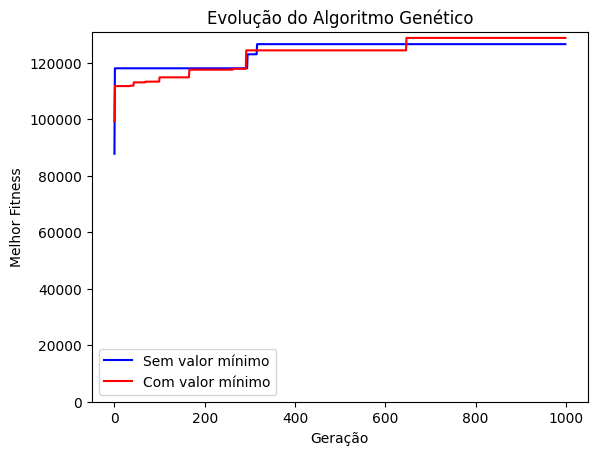

In [370]:
plt.plot(historico_melhores, color='blue', label='Sem valor mínimo')
plt.plot(historico_melhores_valor_minimo, color='red', label='Com valor mínimo')
plt.xlabel('Geração')
plt.ylabel('Melhor Fitness')
plt.title('Evolução do Algoritmo Genético')
plt.legend()
plt.ylim(bottom=0)  # força começar do zero
plt.show()